In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plotly

In [3]:
zomato_data = pd.read_csv("C:/Users/Administrator/Downloads/zomato_restaurants.csv")

In [4]:
zomato_data.shape

(51717, 17)

In [5]:
zomato_data.isnull().sum() / zomato_data.shape[0] * 100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [6]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
zomato_data['rate'].dtype

dtype('O')

#### 1. Total No.of Restaurants

In [8]:
total_no_of_restaurants = len(zomato_data['name'].unique())

In [9]:
total_no_of_restaurants

8792

#### 2. Restaurant with online order

In [10]:
online_order_yes = len(zomato_data[zomato_data['online_order'] == 'Yes']) / zomato_data.shape[0] * 100
online_order_no = len(zomato_data[zomato_data['online_order'] == 'No']) / zomato_data.shape[0] * 100
print("Hotels taking online orders: "+str(online_order_yes)+" %")
print("Hotels not taking online orders: "+str(online_order_no) + " %")

Hotels taking online orders: 58.86652358025407 %
Hotels not taking online orders: 41.133476419745925 %


In [11]:
#other simple way
zomato_data['online_order'].value_counts() / zomato_data.shape[0] * 100

online_order
Yes    58.866524
No     41.133476
Name: count, dtype: float64

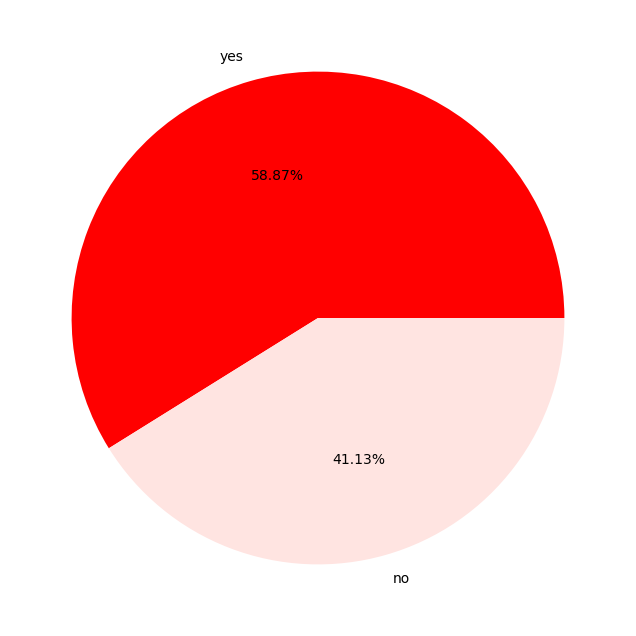

In [12]:
plt.figure(figsize=(14,8))
plt.pie([online_order_yes,online_order_no], labels=['yes','no'], autopct="%0.2f%%", colors=['red','mistyrose'])
plt.show()

In [13]:
#Other way
# plt.pie(zomato_data['online_order'].value_counts(), labels=zomato_data['online_order'].unique(), autopct="%0.2f%%")

#### 2. Restaurant with online Book Table Option.

In [14]:
zomato_data['book_table'].value_counts() / zomato_data.shape[0] * 100

book_table
No     87.530213
Yes    12.469787
Name: count, dtype: float64

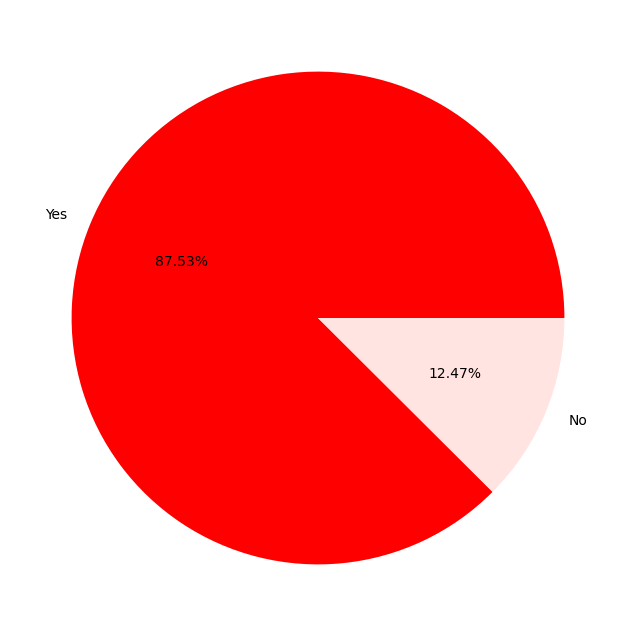

In [15]:
plt.figure(figsize=(14,8))
plt.pie(zomato_data['book_table'].value_counts(), labels=zomato_data['book_table'].unique(), autopct="%0.2f%%", colors=['red','mistyrose'])
plt.show()

#### 4. Famous chains in bengaluru

In [16]:
#get the first part from series use `index` and second part as `values`
#if we need to find the popularity
names = zomato_data['name'].value_counts().sort_values(ascending = False)[:21].index

In [17]:
#get the first part from series use `index` and second part as `values`
restaurant_counts = zomato_data['name'].value_counts().sort_values(ascending = False)[:21].values

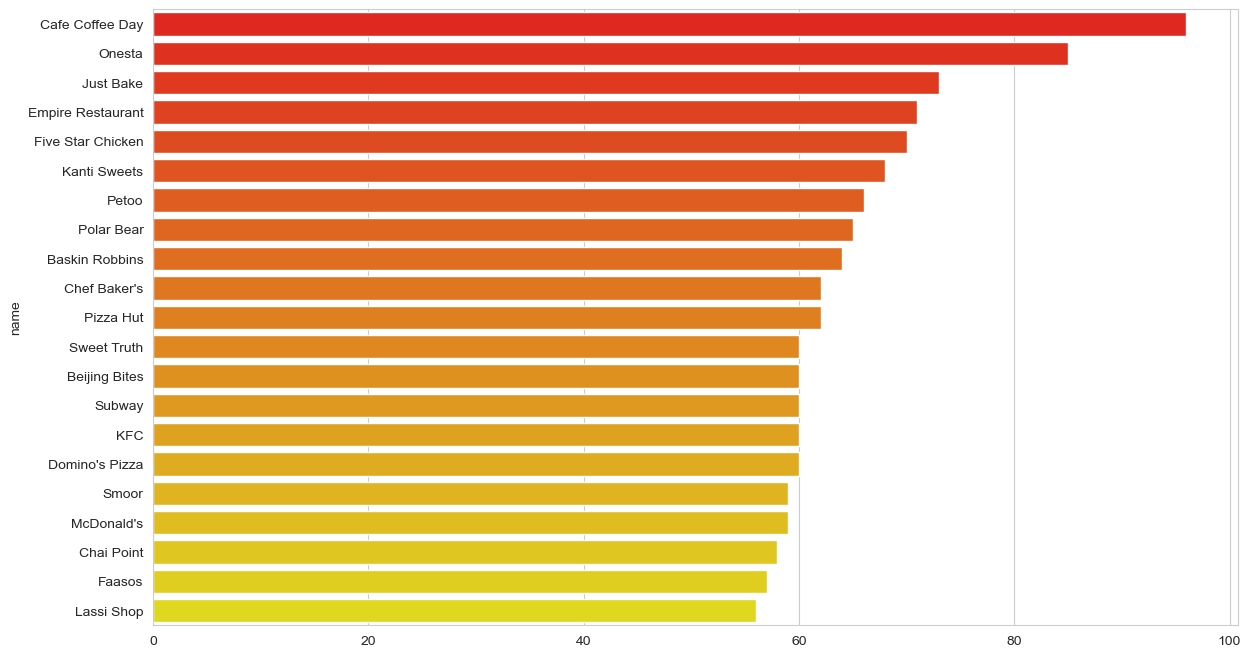

In [18]:
plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
sns.barplot(x = restaurant_counts, y = names, orient='h', hue=names, palette="autumn")
plt.show()

#### 5. Find most popular restaurant types in Bangalore

In [19]:
rest_type = zomato_data['rest_type'].value_counts().sort_values(ascending = False)[:21].index

In [20]:
rest_type_count = zomato_data['rest_type'].value_counts().sort_values(ascending = False)[:21].values

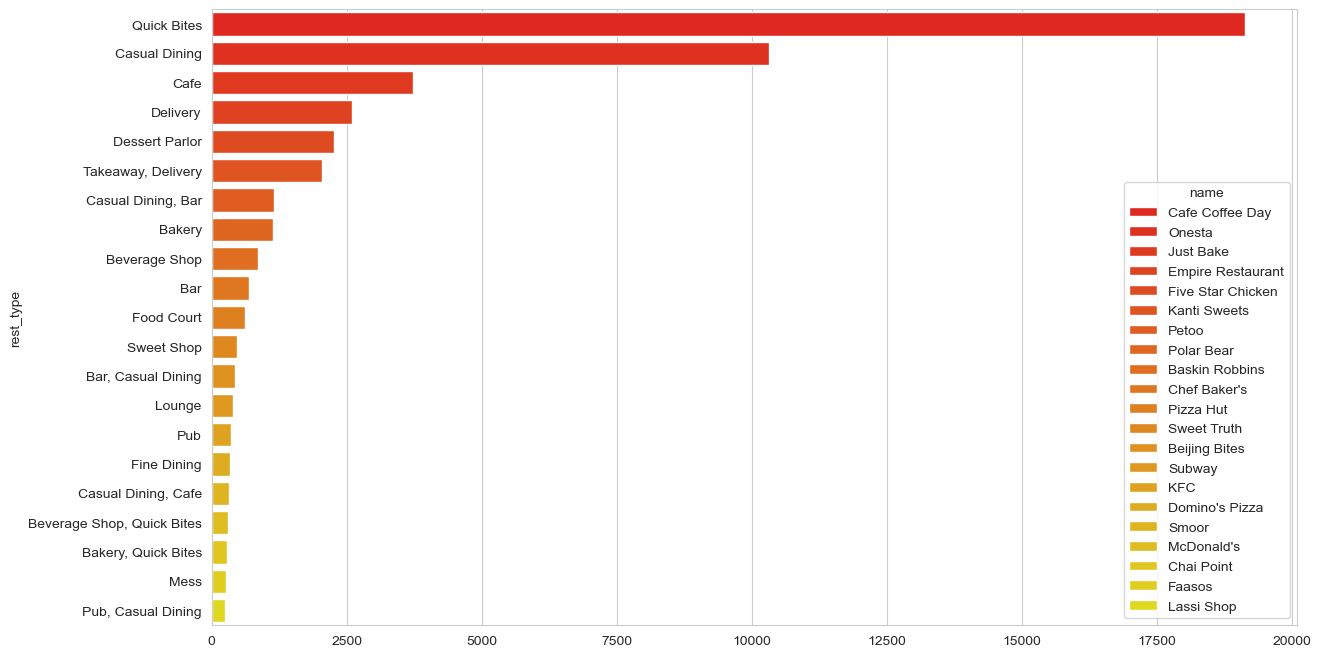

In [21]:
plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
sns.barplot(x = rest_type_count, y = rest_type, orient='h', hue=names, palette="autumn")
plt.show()

- The most popular restaurant type in bengaluru is Quick Bites. and least popular is Pop Up

#### 6. Distribution of Restaurant approax Cost(For 2 people)

In [22]:
 # zomato_data['approx_cost(for two people)'] = list(map(lambda x: float(x[0]+x[1]) if len(x)>1 else float(x[0]),(str(x).split(',') for x in zomato_data['approx_cost(for two people)'])))
zomato_data['approx_cost(for two people)']=zomato_data['approx_cost(for two people)'].str.replace(',','').astype('float64')

In [23]:
zomato_data['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

##### check if it is skewed?


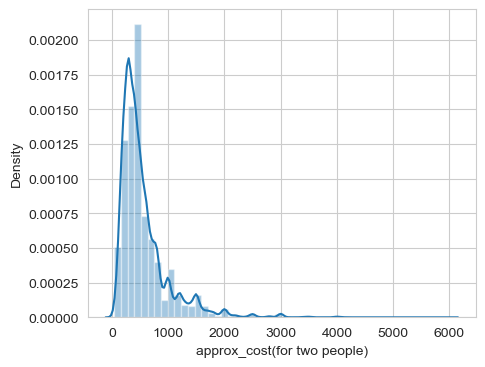

In [24]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(5, 4))
sns.distplot(zomato_data['approx_cost(for two people)'])
plt.show()

- Yes the approax cost for two person is skewed towards positive. Hense positive skewed

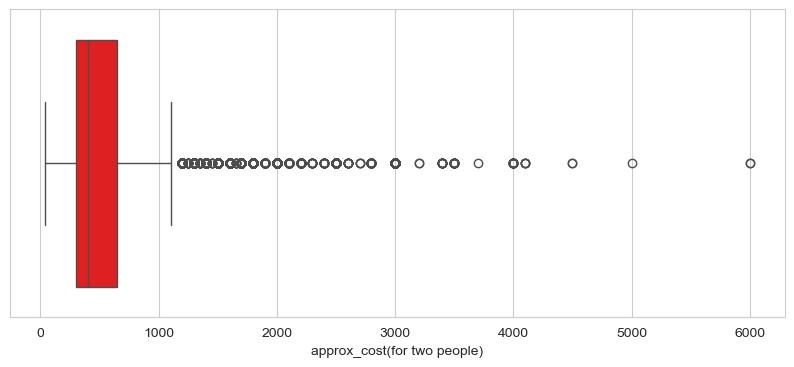

In [25]:
plt.figure(figsize=(10, 4))
sns.boxplot(zomato_data['approx_cost(for two people)'], color='red', orient='h')
plt.show()

In [26]:
#median
zomato_data['approx_cost(for two people)'].median()

400.0

In [27]:
Q1 = zomato_data['approx_cost(for two people)'].quantile(0.25)
Q2 = zomato_data['approx_cost(for two people)'].quantile(0.5)
Q3 = zomato_data['approx_cost(for two people)'].quantile(0.25)

In [28]:
print(f"First Quartile: {Q1}\nMedian: {Q2}\nThird Quartile: {Q3}")

First Quartile: 300.0
Median: 400.0
Third Quartile: 300.0


In [29]:
IQR = Q3 - Q1
print("Inter quartile Range of cost for 2 people is: ",IQR)

Inter quartile Range of cost for 2 people is:  0.0


The Approax cost for 2 people ranges from Rs. 350.0 to Rs. 600.0 with median cost approax cost for two people is skewed towards positive, Hense Positive Skewness

#### 7. Find least popular restaurant types in Bangalore

In [30]:
least_rest_type = zomato_data['rest_type'].value_counts().sort_values(ascending = True)[:21].index
least_rest_count = zomato_data['rest_type'].value_counts().sort_values(ascending = True)[:21].values

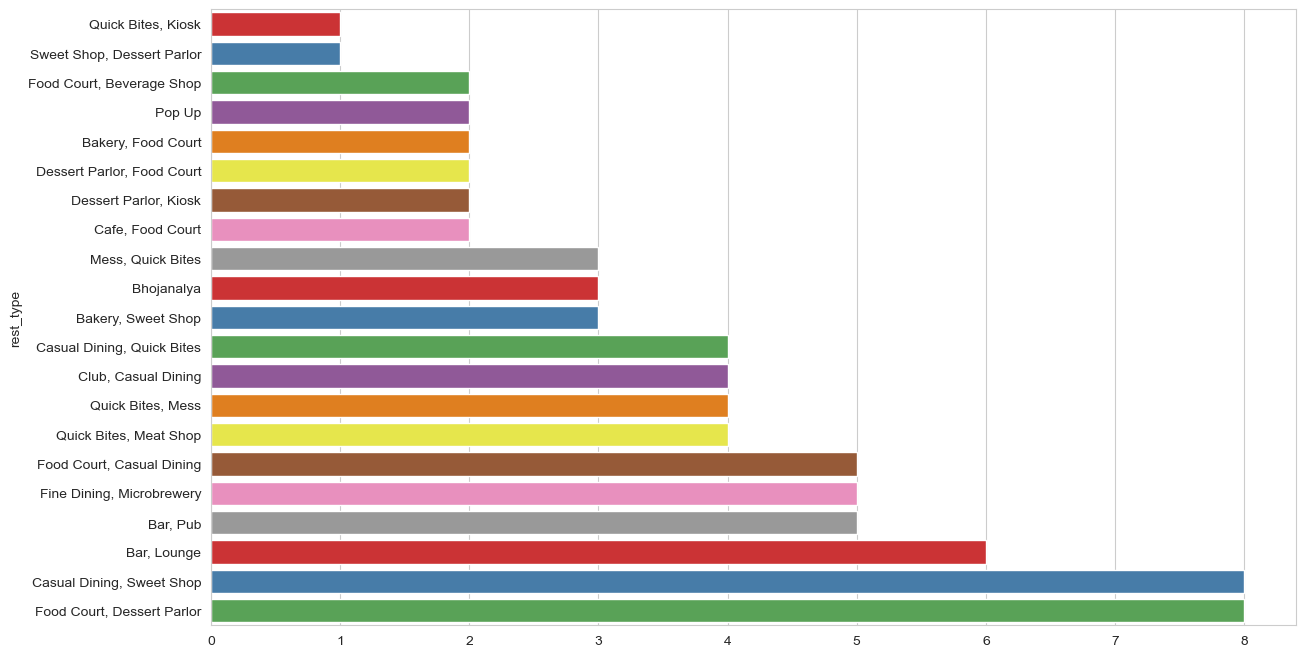

In [31]:
plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
sns.barplot(x = least_rest_count, y = least_rest_type, orient='h', hue=least_rest_type, palette="Set1")
plt.show()

#### 8. Which are the Top 20 locatons with Most Number of Restaurant

In [32]:
city = zomato_data['listed_in(city)'].value_counts().sort_values(ascending = False)[:21].index
city_count = zomato_data['listed_in(city)'].value_counts().sort_values(ascending = False)[:21].values

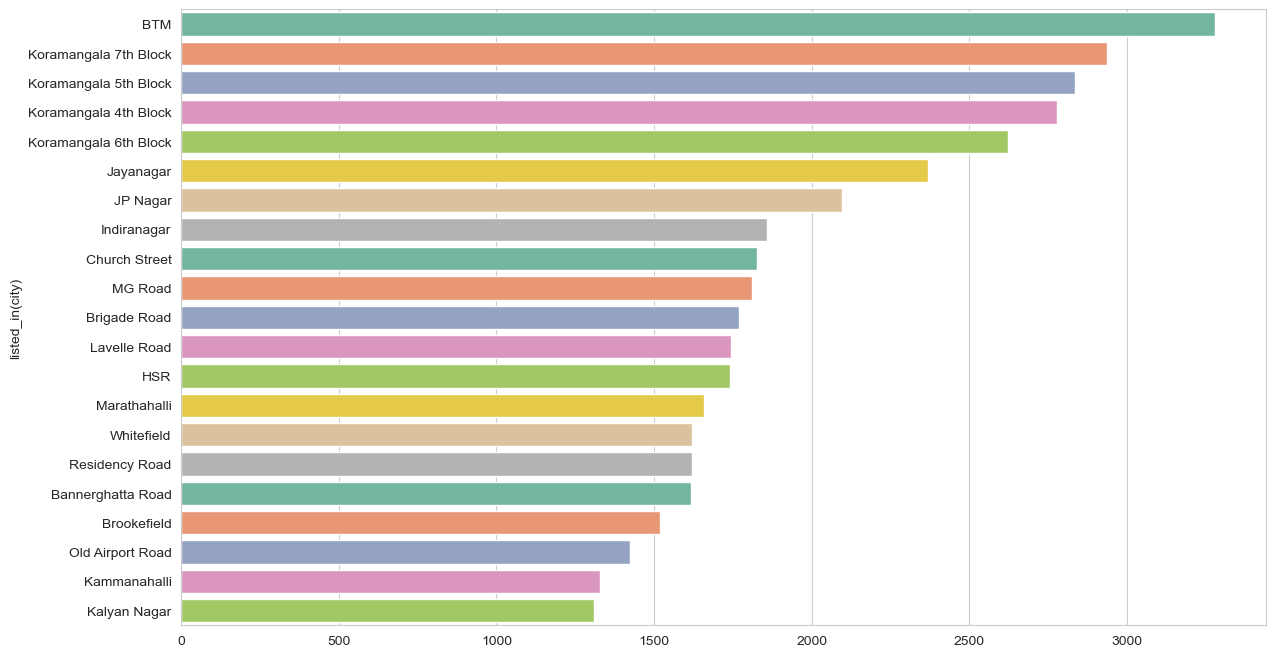

In [33]:
plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
sns.barplot(x = city_count, y = city, orient='h', hue=city, palette="Set2")
plt.show()

- The most popular location in Bengaluru where most number of restaurant are - BTM Layout, Koramangala, Jayanagar

#### 9. Most Popular Restaurant's Category

In [34]:
cuisiness = zomato_data['cuisines'].value_counts().sort_values(ascending = False)[:21].index

In [35]:
cuisiness_count = zomato_data['cuisines'].value_counts().sort_values(ascending = False)[:21].values

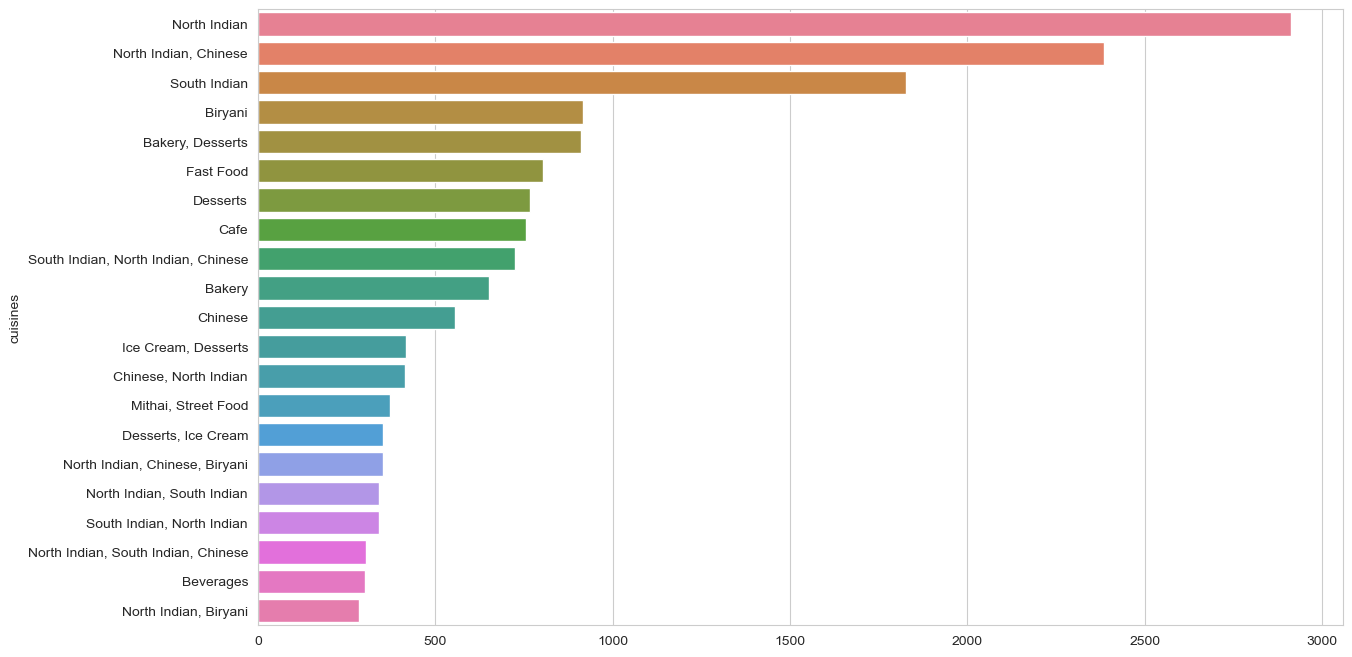

In [36]:
plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
sns.barplot(x =cuisiness_count , y =cuisiness, hue=cuisiness)
plt.show()

- The Most popular restaurants category are North Indian, Chinese, South Indian, Biriyani Outlets.

#### 10. Distribution of Restaurant Ratings

In [37]:
zomato_data['rate'] = zomato_data['rate'].str.replace('/5','').replace('-',np.nan).replace('NEW',np.nan).astype('float64')

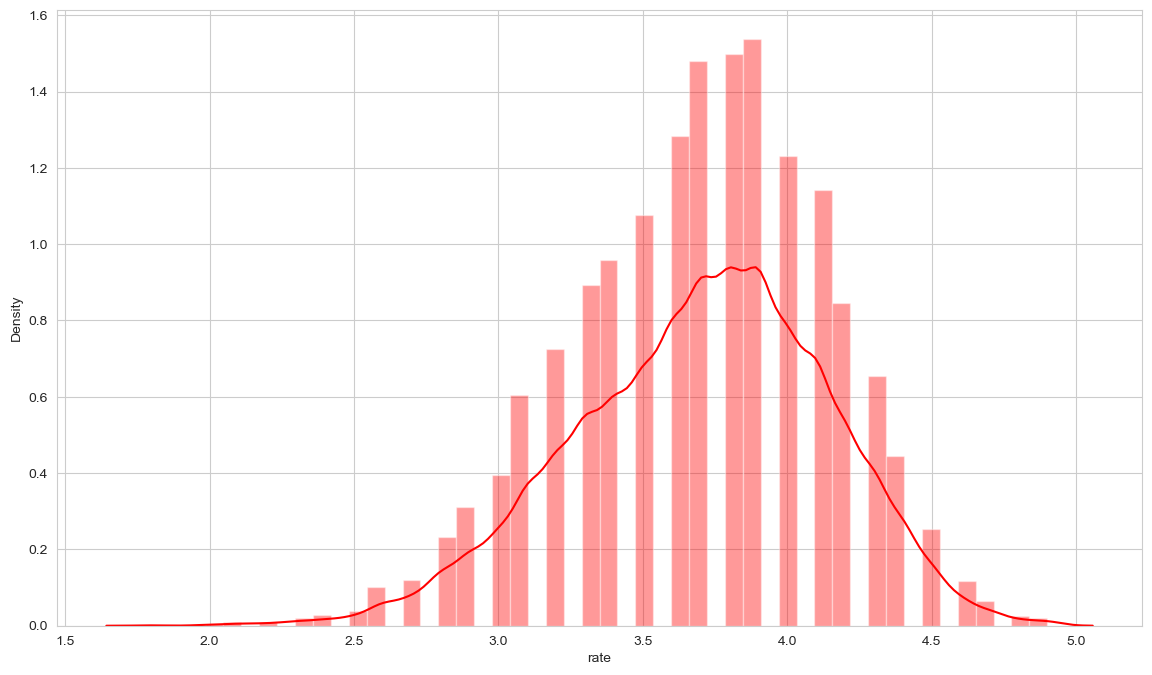

In [38]:
plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
sns.distplot(zomato_data['rate'], color="r")
plt.show()

In [39]:
#Most frequent rating
zomato_data['rate'].mode()

0    3.9
Name: rate, dtype: float64

#### 11. Top Rated Restaurant From top 20 restaurant cuisines type

In [40]:
rest_type_in = zomato_data['rest_type'].value_counts().sort_values(ascending = False)[:21].index

In [41]:
rest_type_in

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Delivery', 'Dessert Parlor',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop',
       'Bar', 'Food Court', 'Sweet Shop', 'Bar, Casual Dining', 'Lounge',
       'Pub', 'Fine Dining', 'Casual Dining, Cafe',
       'Beverage Shop, Quick Bites', 'Bakery, Quick Bites', 'Mess',
       'Pub, Casual Dining'],
      dtype='object', name='rest_type')

In [42]:
zomato_data.groupby('rest_type')[['name','rate']].max().filter(items=rest_type_in, axis=0)

,name,rate
rest_type,,
Quick Bites,repEAT Hub,4.8
Casual Dining,nu.tree,4.9
Cafe,iSpice Resto Cafe,4.6
Delivery,nu.tree,4.6
Dessert Parlor,iFruit Live Ice Creams,4.9
"Takeaway, Delivery",sCoolMeal,4.5
"Casual Dining, Bar",re:cess - Hilton Bangalore Embassy GolfLinks,4.9
Bakery,YummTumm,4.8
Beverage Shop,Zaitoon Lassi Cafe,4.5


#### 12. Relationship between rating and approx cost for 2 people

<Axes: xlabel='rate', ylabel='approx_cost(for two people)'>

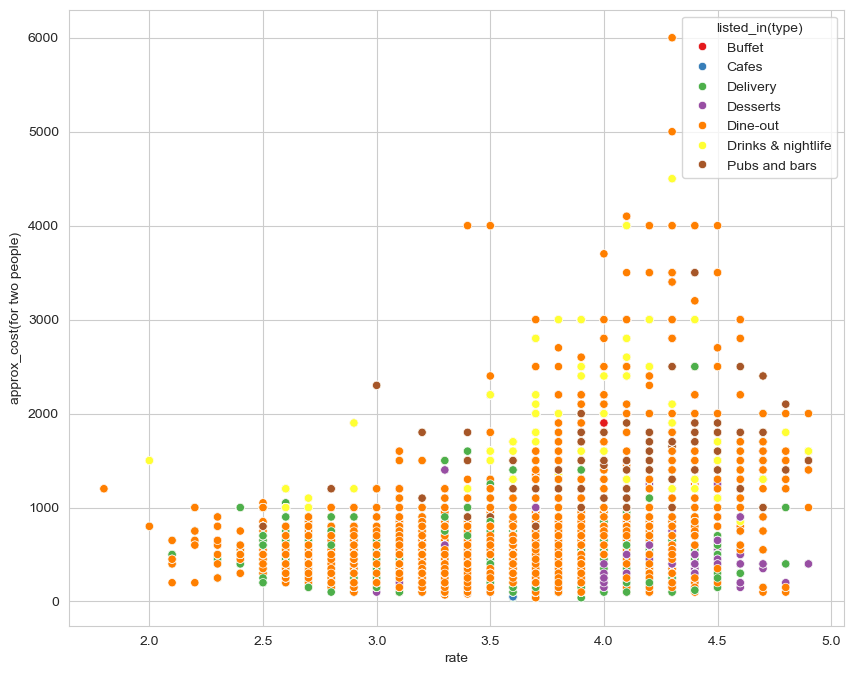

In [43]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'rate', y ='approx_cost(for two people)', data = zomato_data, hue='listed_in(type)',palette='Set1')

- **conclusion** : no relation

#### 13. Highlight the restaurant frequency on Map

In [44]:
!pip install geopy

In [45]:
!pip install folium

In [46]:
from geopy.geocoders import Nominatim
# from folium import 

In [47]:
location = pd.DataFrame({'Name':zomato_data['location'].unique()})

In [48]:
location

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout
...,...
89,West Bangalore
90,Magadi Road
91,Yelahanka
92,Sahakara Nagar


In [49]:
location['Name'] = location['Name'].apply(lambda x: "Bengaluru " + str(x))

In [50]:
location

,Name
0,Bengaluru Banashankari
1,Bengaluru Basavanagudi
2,Bengaluru Mysore Road
3,Bengaluru Jayanagar
4,Bengaluru Kumaraswamy Layout
...,...
89,Bengaluru West Bangalore
90,Bengaluru Magadi Road
91,Bengaluru Yelahanka
92,Bengaluru Sahakara Nagar


In [51]:
geolocator = Nominatim(user_agent="app")

In [52]:
lat_long=[]
for loc in location['Name']:
    loc = geolocator.geocode(loc)
    if loc is None:
        lat_long.append(np.nan)
    else:
        geo = (loc.latitude, loc.longitude)
        lat_long.append(geo)
        


In [53]:
lat_long

[(12.9393328, 77.5539819),
 (12.9417261, 77.5755021),
 (12.953672, 77.5425121),
 (12.9418488, 77.5868976),
 (12.9067683, 77.5595021),
 (12.9274413, 77.5155224),
 nan,
 (12.9055682, 77.5455438),
 (12.9096941, 77.5866067),
 (12.98815675, 77.62260003796),
 (12.965717999999999, 77.5762705372058),
 (12.96757385, 77.51180117435558),
 (12.9521804, 77.6041899),
 (12.9163603, 77.604733),
 (12.9390426, 77.575291),
 (12.9089453, 77.6239038),
 (17.7251968, 83.3332576),
 (12.985098650000001, 77.66311735),
 (12.848759900000001, 77.64825295827616),
 (12.90056335, 77.64947470503677),
 (12.9552572, 77.6984163),
 (12.9243866, 77.6508897),
 (12.9489339, 77.5968273),
 (12.9575547, 77.5979099),
 (12.9348429, 77.6189768),
 (12.9408685, 77.617338),
 (12.9700474, 77.6171042),
 (12.9364846, 77.6134783),
 (13.0394104, 77.5197351),
 (12.9327778, 77.6294052),
 (12.93103185, 77.6782471),
 (12.9696365, 77.7497448),
 (13.0011462, 77.6183453),
 (12.9604498, 77.642725),
 (12.9962979, 77.5452778),
 (12.9277245, 77.6327

In [54]:
zomato_data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


,Max Speed
Animal,
Falcon,375.0
Parrot,25.0
